# Реализовать и сравнить разные виды стэкинга
Для реализации были взяты игрушечные данные breast_cancer из sklearn.datasets. Метрикой качества выбран ROC-AUC

In [178]:
import numpy as np

In [179]:
from sklearn import datasets
from sklearn import metrics

breast_cancer = datasets.load_breast_cancer() #dataset loading
X = breast_cancer.data               #Features stored in X 
y = breast_cancer.target             #Class variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [180]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

В стэкинге использовались модели
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification

И оценки точности каждой модели ниже. Перовоначальные параметры остаются неизменными для всех следующих выводов, чтобы явно показать, на сколько меняется точность добавлением мета-признаков

Для начала посмотрим, как модели работают отдельно друг от друга

In [181]:
predicts_concat = []
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42, max_iter=1200000)
classifier.fit(X_train, y_train)
predicts_concat.append(classifier.predict(X_test))
print("Logistic Regression\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
print("KNeighborsClassifier\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
print("SVC use Support Vector Machine\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
print("SVC use Kernel SVM\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print("GaussianNB\t\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print("DecisionTreeClassifier\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print("RandomForestClassifier\t\t ",metrics.roc_auc_score(classifier.predict(X_test), y_test))
predicts_concat.append(classifier.predict(X_test))


Logistic Regression		  0.9550314465408806
KNeighborsClassifier		  0.9580043859649122
SVC use Support Vector Machine	  0.970020964360587
SVC use Kernel SVM		  0.9642857142857143
GaussianNB			  0.910062893081761
DecisionTreeClassifier		  0.9522727272727273
RandomForestClassifier		  0.9670454545454545


Если взять медиану из всех выводов, то точность стала равна точности лучшей модели из данных

In [182]:
print("Median of predicts\t\t ", metrics.roc_auc_score(np.median(np.array(predicts_concat), axis=0), y_test))

Median of predicts		  0.970020964360587


In [183]:
def namefunc(n):
    if n == 0:
        return "Logistic Regression\t\t "
    if n == 1:
        return "KNeighborsClassifier\t\t "
    if n == 2:
        return "SVC use Support Vector Machine\t "
    if n == 3:
        return "SVC use Kernel SVM\t\t "
    if n == 4:
        return "GaussianNB\t\t\t "
    if n == 5:
        return "DecisionTreeClassifier\t\t "
    if n == 6:
        return "RandomForestClassifier\t\t "

In [184]:
models = [LogisticRegression(random_state = 42, max_iter=1200000),
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          SVC(kernel = 'rbf', random_state = 0),
          GaussianNB(),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]

In [185]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, 
                                                                            test_size = 0.35, random_state = 0)

### Реализован метод блендинга, описанный на слайде

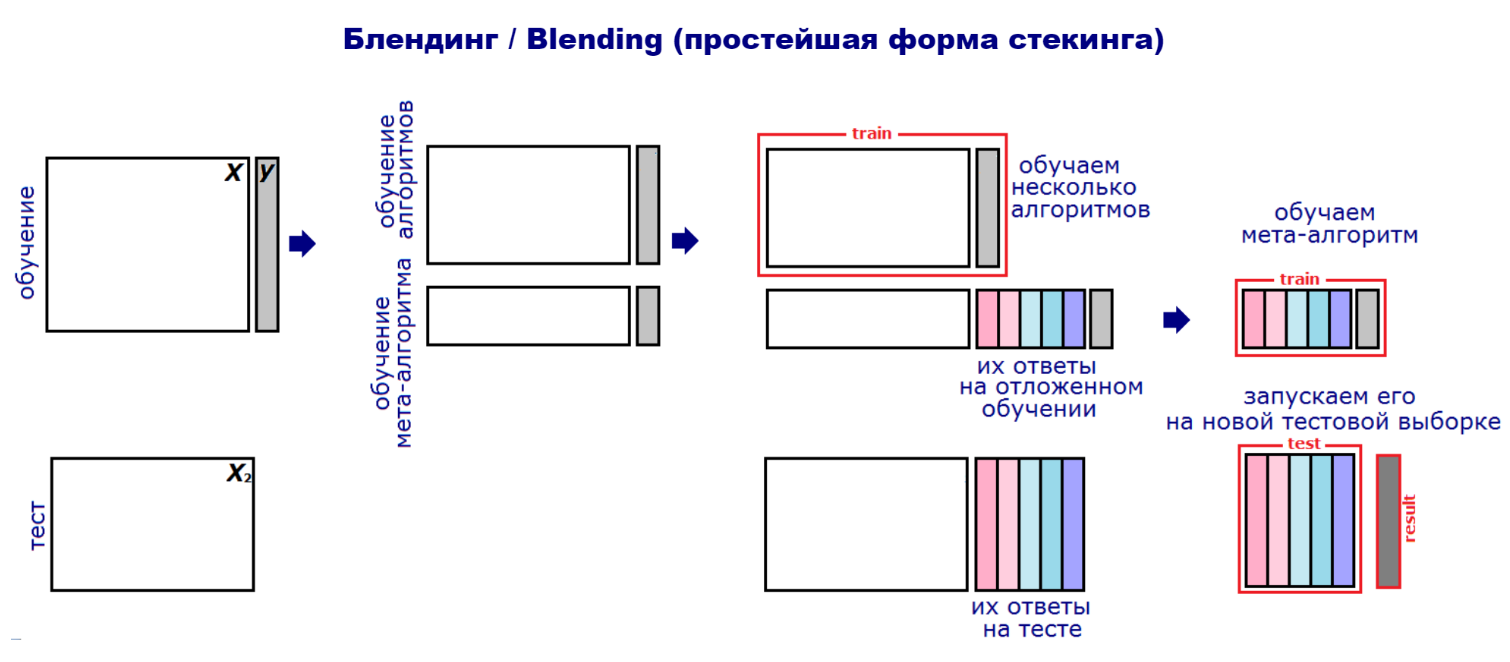

In [186]:
from IPython.core.display import Image, display
display(Image('C://Users//timur//DYAKONOV//1//1.png', width=900, unconfined=True))

In [187]:
meta_d = []
for model in models:
    model.fit(X_train_train, y_train_train)
    meta_d.append(model.predict(X_train_test))

meta_f = []
for model in models:
    model.fit(X_train, y_train)
    meta_f.append(model.predict(X_test))

for i in range(7):
    fin_model = models[i]
    fin_model.fit(np.array(meta_d).T, y_train_test)
    print("Blending with meta-algorithm by " + namefunc(i), metrics.roc_auc_score(fin_model.predict(np.array(meta_f).T), y_test))

Blending with meta-algorithm by Logistic Regression		  0.970020964360587
Blending with meta-algorithm by KNeighborsClassifier		  0.970020964360587
Blending with meta-algorithm by SVC use Support Vector Machine	  0.9642857142857143
Blending with meta-algorithm by SVC use Kernel SVM		  0.9642857142857143
Blending with meta-algorithm by GaussianNB			  0.9758635039533916
Blending with meta-algorithm by DecisionTreeClassifier		  0.9586530264279625
Blending with meta-algorithm by RandomForestClassifier		  0.9642857142857143


Вывод: в большинстве видно увеличение точности по всем моделям

### Второй вид стекнга реализован из следующего слайда

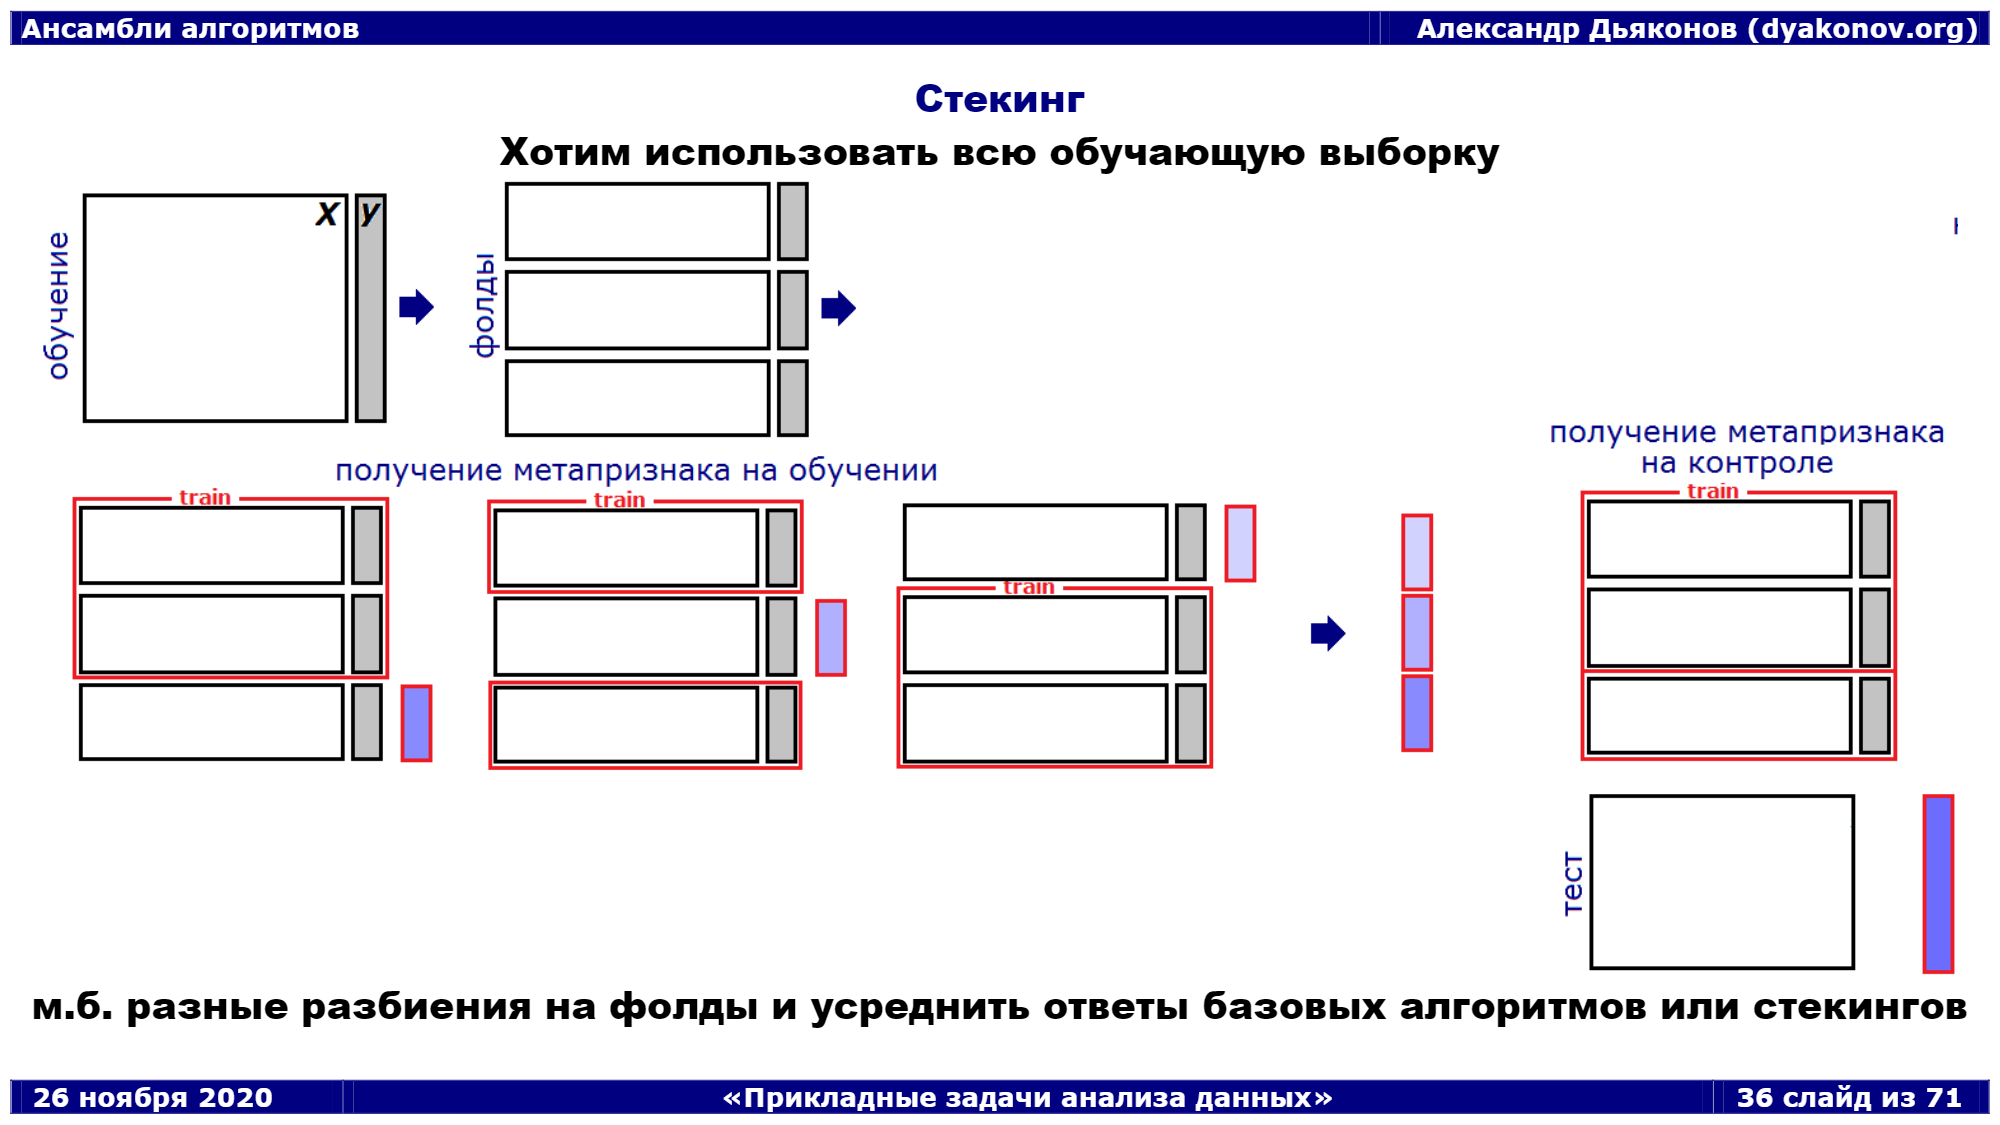

In [188]:
display(Image('C://Users//timur//DYAKONOV//1//2.png', width=900, unconfined=True))

In [189]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(X_train)
from sklearn.metrics import accuracy_score

In [190]:
new_X_train = np.copy(X_train)
new_X_test = np.copy(X_test)

In [191]:
# New_X_train = np.copy(X_train)
for model in models:
    model.fit(X_train, y_train)
    new_X_test = np.concatenate((new_X_test, np.expand_dims(model.predict(X_test), axis=0).T ), axis=1)

In [192]:
for model in models:
    new_column = np.zeros(len(X_train))
    for train_index, test_index in kf.split(X_train):
        kX_train, kX_test = X_train[train_index], X_train[test_index]
        ky_train, ky_test = y_train[train_index], y_train[test_index]
        model.fit(kX_train, ky_train)
        new_column[test_index] = model.predict(kX_test)
    new_X_train = np.concatenate((new_X_train, np.expand_dims(new_column, axis=0).T), axis=1)

Для сравнения предаставлены оценки точности без стекинга

In [193]:
for i in range(7):
    fin_model =  models[i]
    fin_model.fit(X_train, y_train)
    print("Just model  without  stacking "+namefunc(i), metrics.roc_auc_score(fin_model.predict(X_test), y_test))

Just model  without  stacking Logistic Regression		  0.9550314465408806
Just model  without  stacking KNeighborsClassifier		  0.9580043859649122
Just model  without  stacking SVC use Support Vector Machine	  0.970020964360587
Just model  without  stacking SVC use Kernel SVM		  0.9642857142857143
Just model  without  stacking GaussianNB			  0.910062893081761
Just model  without  stacking DecisionTreeClassifier		  0.9522727272727273
Just model  without  stacking RandomForestClassifier		  0.9670454545454545


In [194]:
for i in range(7):
    fin_model =  models[i]
    fin_model.fit(new_X_train, y_train)
    print("Stack by "+namefunc(i), metrics.roc_auc_score(fin_model.predict(new_X_test), y_test))

Stack by Logistic Regression		  0.9550314465408806
Stack by KNeighborsClassifier		  0.968494623655914
Stack by SVC use Support Vector Machine	  0.9550314465408806
Stack by SVC use Kernel SVM		  0.9758635039533916
Stack by GaussianNB			  0.9670454545454545
Stack by DecisionTreeClassifier		  0.9818181818181818
Stack by RandomForestClassifier		  0.970020964360587


По всем моделям виден прирост качества, но от блендинга в лучшую сторону отличается лишь часть.

### Рассмотрен третий вариант стекинга, показанный на следующем слайда

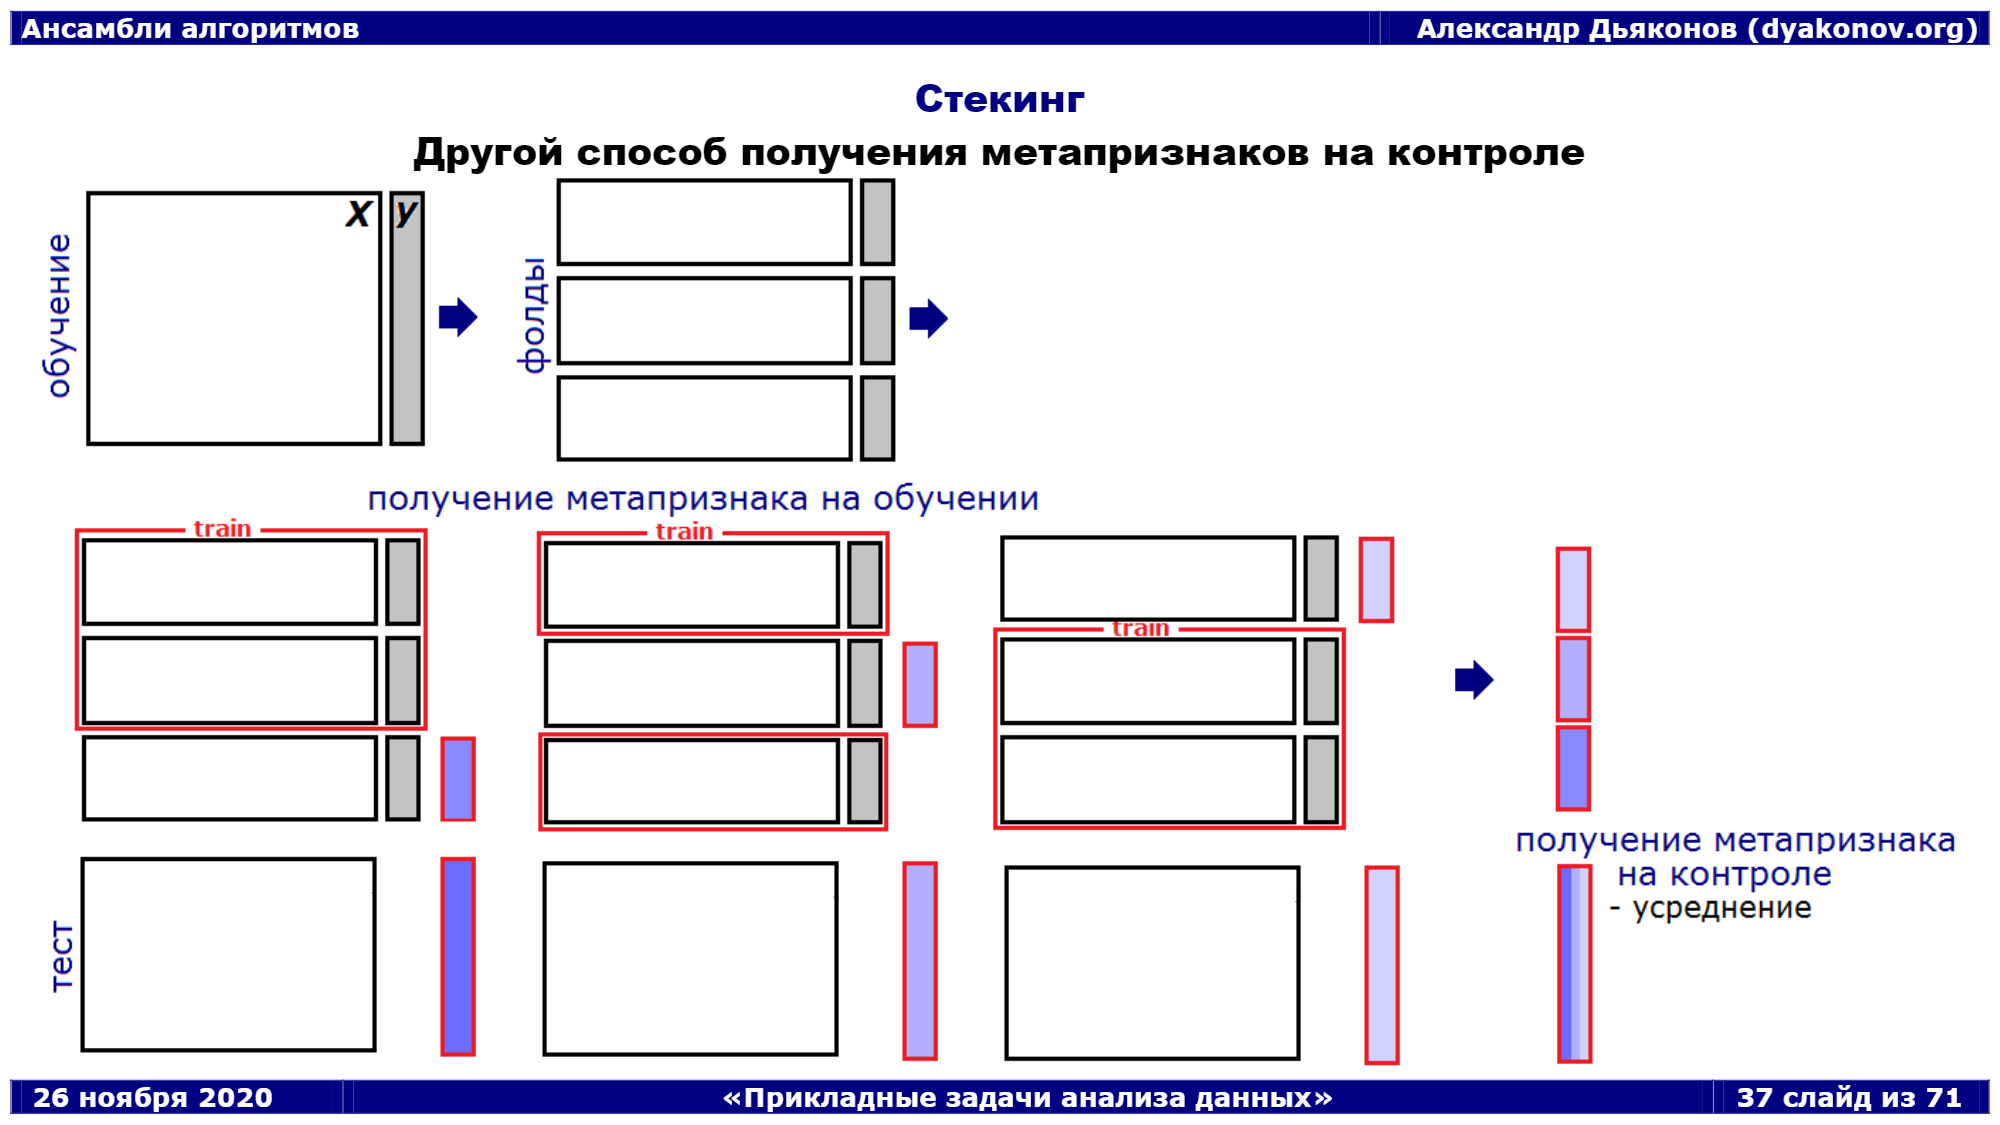

In [195]:
display(Image('C://Users//timur//DYAKONOV//1//3.png', width=900, unconfined=True))

In [196]:
new_X_train = np.copy(X_train)
new_X_test = np.copy(X_test)

In [197]:
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)

3

In [198]:
new_column = np.zeros(len(X_train))
# model = models[0]
i = -1
for train_index, test_index in kf.split(X_train):
    i+=1
    model = models[i]
    kX_train, kX_test = X_train[train_index], X_train[test_index]
    ky_train, ky_test = y_train[train_index], y_train[test_index]
    model.fit(kX_train, ky_train)
    new_column[test_index] = model.predict(kX_test)
new_X_train = np.concatenate((new_X_train, np.expand_dims(new_column, axis=0).T), axis=1)

In [199]:
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)

3

In [200]:
for train_index, test_index in kf.split(X_train):
    i+=1
    model = models[i]
    kX_train, kX_test = X_train[train_index], X_train[test_index]
    ky_train, ky_test = y_train[train_index], y_train[test_index]
    model.fit(kX_train, ky_train)
    new_column[test_index] = model.predict(kX_test)
new_X_train = np.concatenate((new_X_train, np.expand_dims(new_column, axis=0).T), axis=1)

In [201]:

for i in range(6):
    if i % 3 == 0:
        predicts_concat = []
    model = models[i]
    model.fit(X_train, y_train)
    predicts_concat.append(model.predict(X_test))
    if i % 3 == 2:
        new_X_test = np.concatenate((new_X_test, np.expand_dims(np.median(np.array(predicts_concat), axis=0), axis=0).T ), axis=1)
        # print(np.median(np.array(predicts_concat), axis=0).shape)

In [202]:
for i in range(7):
    fin_model =  models[i]
    fin_model.fit(X_train, y_train)
    print("Just model  without  stacking " + namefunc(i), metrics.roc_auc_score(fin_model.predict(X_test), y_test))

Just model  without  stacking Logistic Regression		  0.9550314465408806
Just model  without  stacking KNeighborsClassifier		  0.9580043859649122
Just model  without  stacking SVC use Support Vector Machine	  0.970020964360587
Just model  without  stacking SVC use Kernel SVM		  0.9642857142857143
Just model  without  stacking GaussianNB			  0.910062893081761
Just model  without  stacking DecisionTreeClassifier		  0.9522727272727273
Just model  without  stacking RandomForestClassifier		  0.9670454545454545


In [203]:
for i in range(7):
    fin_model =  models[i]
    fin_model.fit(new_X_train, y_train)
    print("Stack by " + namefunc(i), metrics.roc_auc_score(fin_model.predict(new_X_test), y_test))

Stack by Logistic Regression		  0.9738917306052857
Stack by KNeighborsClassifier		  0.9632001736864958
Stack by SVC use Support Vector Machine	  0.9642857142857143
Stack by SVC use Kernel SVM		  0.9850104821802935
Stack by GaussianNB			  0.9609862671660424
Stack by DecisionTreeClassifier		  0.9850104821802935
Stack by RandomForestClassifier		  0.970020964360587


Данный вид стекинга был лучшим в смысле прироста оценки качества по всем моделям. Также ниже представлена модель классификатора на catboost и в данном исследовании это модель с наибольшей оценкой качества метрикой ROC-AUC(Сходится дольше всех, но точнее всех). Если посмотреть на модели выше, то  такая же точность была достигнута простым добавлением всего двух мета-признаков третим вариантом стекинга.

In [204]:
from catboost import CatBoostClassifier
fin_model = CatBoostClassifier(iterations=600,
                           learning_rate=0.01,
                           depth=6,
                           silent = True)
fin_model.fit(X_train, y_train)
metrics.roc_auc_score(fin_model.predict(X_test), y_test)

0.9850104821802935

<pre>
Выводы:

Обычное усреднение выводов всех выводов моделей  
Median of predicts		              0.970020964360587

Блендинг и оценка точности с мета-алгоритмами ниже
1. Logistic Regression		          0.970020964360587
2. KNeighborsClassifier		          0.970020964360587
3. SVC use Support Vector Machine	  0.9642857142857143
4. SVC use Kernel SVM		          0.9642857142857143
5. GaussianNB			              0.9758635039533916
6. DecisionTreeClassifier	  	      0.9586530264279625
7. RandomForestClassifier		      0.9642857142857143

Стекинг второго типа и оценка точночти с мета-алгоритмами ниже
1. Logistic Regression		          0.9550314465408806
2. KNeighborsClassifier		          0.968494623655914
3. SVC use Support Vector Machine     0.9550314465408806
4. SVC use Kernel SVM		          0.9758635039533916
5. GaussianNB			              0.9670454545454545
6. DecisionTreeClassifier		      0.9818181818181818
7. RandomForestClassifier		      0.970020964360587

Стекинг третьего типа и оценка точночти с мета-алгоритмами ниже
1. Logistic Regression		          0.9738917306052857
2. KNeighborsClassifier		          0.9632001736864958
3. SVC use Support Vector Machine	  0.9642857142857143
4. SVC use Kernel SVM		          0.9850104821802935
5. GaussianNB			              0.9609862671660424
6. DecisionTreeClassifier		      0.9850104821802935
7. RandomForestClassifier		      0.970020964360587
</pre>

Для этих данных лучше всего сработал третий вид стекинга и показывает больший прирост оценки качества при добавлении мета-признаков. НО в общем виде непонятно, можно ли эти разницы называть существенными, но то, что разница есть - правда.